In [5]:
import tensorflow as tf
from matplotlib import pyplot as plt
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'
tf.random.set_seed(seed=1322)

In [6]:
n_train = 50
x_train = tf.sort(tf.random.uniform(shape=(n_train,), maxval=5))

def f(x):
    return 2 * tf.sin(x) + x**0.8

y_train = f(x_train) + tf.random.normal((n_train,), 0.0, 0.5)  # Training outputs
x_test = tf.range(0, 5, 0.1)  # Testing examples
y_truth = f(x_test)  # Ground-truth outputs for the testing examples
n_test = len(x_test)  # No. of testing examples
n_test

50

In [7]:
def plot_kernel_reg(y_hat):
    plt.plot(x_test, y_truth)
    plt.plot(x_test, y_hat)
    plt.plot(x_train, y_train, 'o', alpha=0.5);

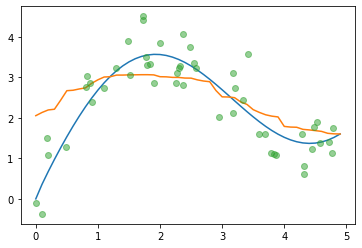

In [8]:
# Shape of `X_repeat`: (`n_test`, `n_train`), where each row contains the
# same testing inputs (i.e., same queries)
X_repeat = tf.repeat(tf.expand_dims(x_train, axis=0), repeats=n_train, axis=0)
# Note that `x_train` contains the keys. Shape of `attention_weights`:
# (`n_test`, `n_train`), where each row contains attention weights to be
# assigned among the values (`y_train`) given each query
attention_weights = tf.nn.softmax(-(X_repeat - tf.expand_dims(x_train, axis=1))**2/2, axis=1)
# Each element of `y_hat` is weighted average of values, where weights are attention weights
y_hat = tf.matmul(attention_weights, tf.expand_dims(y_train, axis=1))
plot_kernel_reg(y_hat)